In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

# fig_DIR = "../figs/team_ratings/"
box_DIR = "../data/box/"
img_DIR_P = "../data/images/players/"

In [41]:
dfa = []
for season in range(2019,2024):
    df1 = pd.read_parquet(box_DIR + f"NBA_Box_P_Cum_Base_{season}.parquet")
    df1["Season"] = season +1
    dfa.append(df1)
df2 = pd.concat(dfa)

In [42]:
players = ["LeBron James","Chris Paul","Kevin Durant","Russell Westbrook","Stephen Curry","James Harden","Jimmy Butler","Paul George"]
# players = ["Joel Embiid"]
pIDs = [get_pID(pp) for pp in players]
df2["Season"] = pd.Categorical(df2["Season"])
df3 = df2[df2["PLAYER_ID"].isin(pIDs)]
df3 = df3.sort_values(["AGE"])

In [43]:
from plotnine import geom_histogram, after_stat, stat_bin, geom_col, scale_fill_brewer,scale_fill_discrete, position_stack
from mizani.formatters import percent_format

In [44]:
colors = [
    '#000000',
    '#0057e7',
    '#d62d20',
    '#008744',
    '#ffa700',
    '#9AA0A6',
    '#4d1b7b',
]

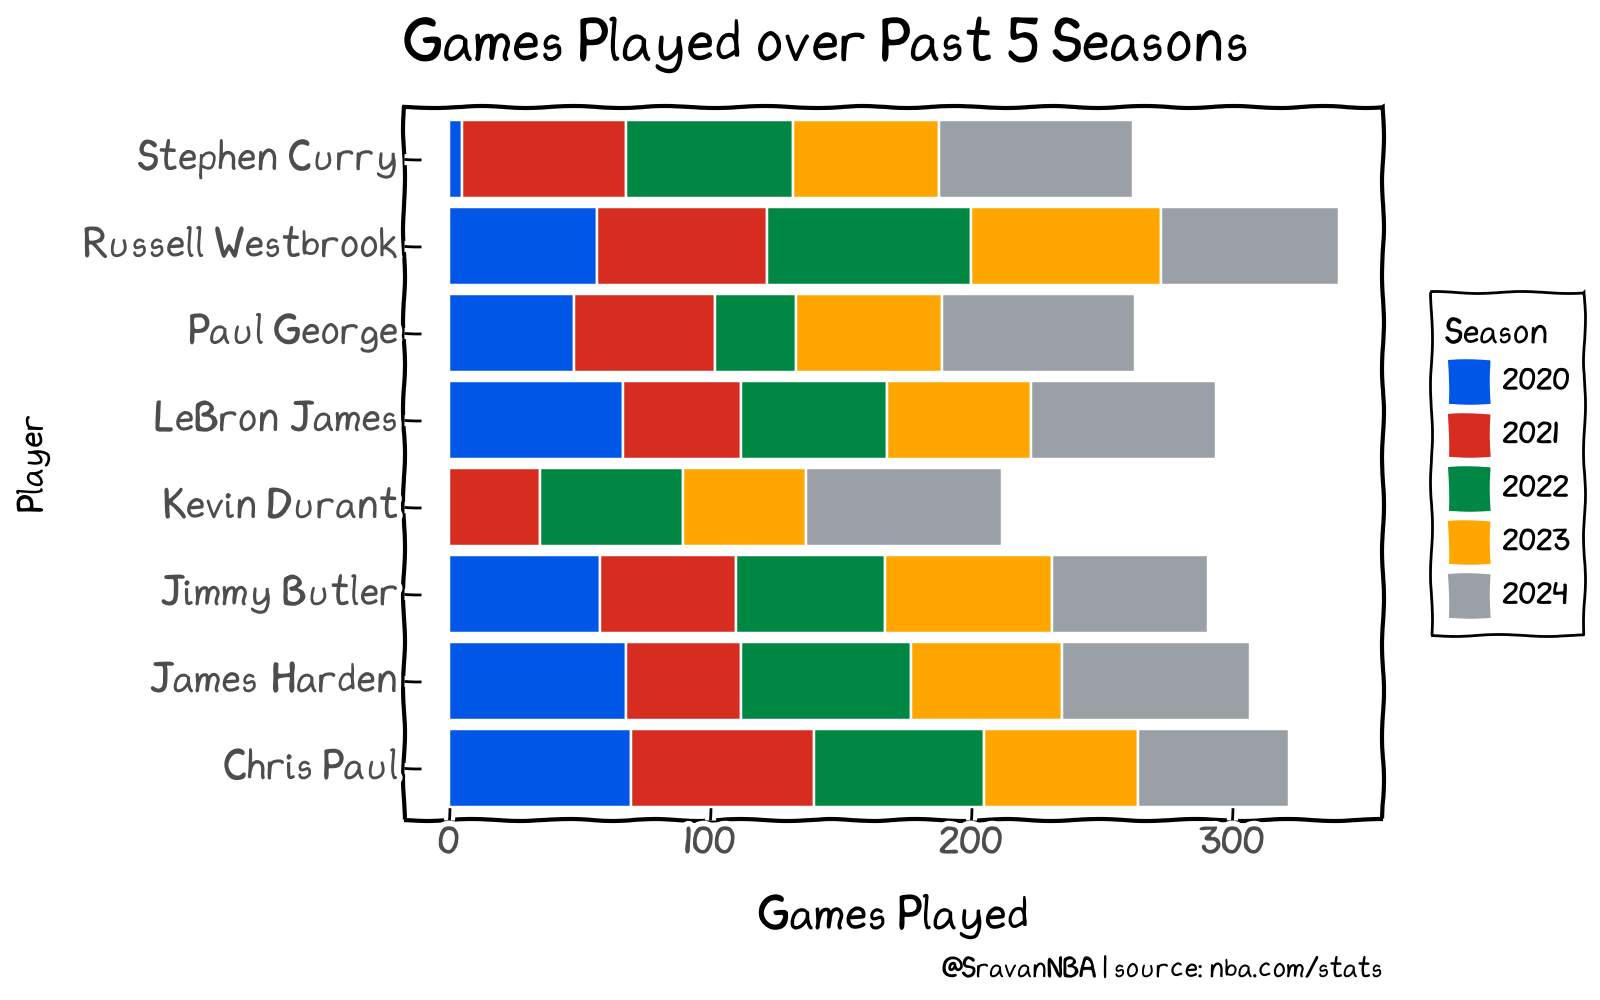

<Figure Size: (800 x 500)>

In [45]:
p = (
    ggplot(df3)
    + aes(x="PLAYER_NAME",y="GP",fill="Season")
    + geom_col(position=position_stack(reverse=True),color="white")
    + scale_fill_manual(values = colors[1:-1], name="Season")
    + coord_flip()
    + theme_idv
    + labs(
        y="Games Played",
        x="Player",
        title="Games Played over Past 5 Seasons",
        caption="@SravanNBA | source: nba.com/stats",
    )
    + theme(
        figure_size=(8,5),
        axis_text_y=element_text(size=14),
        axis_text_x=element_text(size=12),
        axis_title_x=element_text(size=16),
        plot_title=element_text(size=20),
    )
)
# p.save(fig_DIR + "salary_col.png", verbose=False,dpi=300)
p